# Example Vis 3

In [1]:
from math import ceil
import pystare as ps

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import cartopy.crs as ccrs

import numpy as np

In [2]:
def shiftarg_lon(lon):
    "If lon is outside +/-180, then correct back."
    if(lon>180):
        return ((lon + 180.0) % 360.0)-180.0
    else:
        return lon

def triangulate1(lats,lons):
    "Prepare data for tri.Triangulate."
    print('triangulating1...')
    intmat=[]
    npts=int(len(lats)/3)
    k=0
    for i in range(npts):
        intmat.append([k,k+1,k+2])
        k=k+3
    for i in range(len(lons)):
        lons[i] = shiftarg_lon(lons[i])
    print('triangulating1 done.')      
    return lons,lats,intmat

def plot1(lon,lat,lons,lats,triang,c0='r',c1='b',transf=None,lw=1):
    if(lon is not None):
        x=np.zeros([lon.size+1],dtype=np.double);x[:-1]=lon[:];x[-1]=lon[0]
        y=np.zeros([lat.size+1],dtype=np.double); y[:-1]=lat[:]; y[-1]=lat[0]
        ax.plot(x,y,True,transform=transf,c=c0)
    plt.triplot(triang,c1+'-',transform=transf,lw=lw,markersize=3)
    plt.scatter(lons,lats,s=10,c=c1,transform=ccrs.PlateCarree())
    return

def plot2(sivs,c1='g',transf=None):
    lath0,lonh0,lathc0,lonhc0 = ps.to_vertices_latlon(sivs)
    lons0,lats0,intmat0 = triangulate1(lath0,lonh0)
    triang0 = tri.Triangulation(lons0,lats0,intmat0)
    ax.triplot(triang0,c1+'-',transform=transf)
    return

def make_hull(lat0,lon0,resolution0):
    hull0 = ps.to_hull_range_from_latlon(lat0,lon0,resolution0)
    lath0,lonh0,lathc0,lonhc0 = ps.to_vertices_latlon(hull0)
    lons0,lats0,intmat0 = triangulate1(lath0,lonh0)
    triang0 = tri.Triangulation(lons0,lats0,intmat0)
    return lats0,lons0,triang0,hull0

def make_nc_hull(lat0,lon0,resolution0,restrict=None):
    hull0 = ps.cover_from_ring(lat0, lon0, resolution0)
    print('make_nc_hull hull size: ',len(hull0))
    if restrict is not None:
        try:
            hull0=hull0[restrict[0]:restrict[1]]
        except:
            hull0=hull0[0:1]
    lath0,lonh0,lathc0,lonhc0 = ps.to_vertices_latlon(hull0)
    lons0,lats0,intmat0 = triangulate1(lath0,lonh0)
    triang0 = tri.Triangulation(lons0,lats0,intmat0)
    return lats0,lons0,triang0,hull0

triangulating1...
triangulating1 done.
hull0:  1416
triangulating1...
triangulating1 done.
triangulating1...
triangulating1 done.
triangulating1...
triangulating1 done.
triangulating1...
triangulating1 done.
make_nc_hull hull size:  1610
triangulating1...
triangulating1 done.
make_nc_hull hull size:  889
triangulating1...
triangulating1 done.
hull6:  0x0
make_nc_hull hull size:  1600
triangulating1...
triangulating1 done.
hull6a:  0x3d2aa80000000008


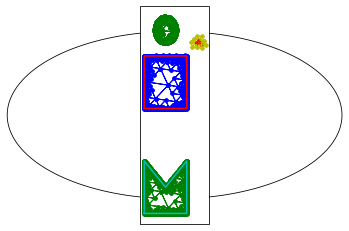

Spatial ID 0x3800000000000000
triangulating1...
triangulating1 done.


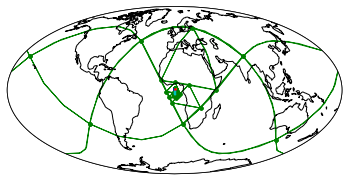

In [3]:
# figax = add_coastlines(plt.subplots(subplot_kw={'projection':proj,'transform':transf}))

# resolution = 7
# resolution = 12
resolution = 13 
resolution0 = resolution
lat0 = np.array([ 0, 0, 1,1], dtype=np.double)
lon0 = np.array([ 0,1,1,0], dtype=np.double)
lats0,lons0,triang0,hull0 = make_hull(lat0,lon0,resolution0)
print('hull0: ',len(hull0))

idx  = ps.from_latlon(np.array([1.25],dtype=np.double),np.array([1.25],dtype=np.double),10)
nbrs = ps.to_neighbors(idx)

latn,lonn,latcn,loncn = ps.to_vertices_latlon(idx)
lons1,lats1,intmat1 = triangulate1(latn,lonn)
triang1 = tri.Triangulation(lons1,lats1,intmat1)

lata,lona,latca,lonca = ps.to_vertices_latlon(nbrs)
lons2,lats2,intmat2 = triangulate1(lata,lona)
triang2 = tri.Triangulation(lons2,lats2,intmat2)

# idx1  = ps.from_latlon(np.array([1.5],dtype=np.double),np.array([0.5],dtype=np.double),10)
cover = ps.to_circular_cover(1.5,0.5,0.25,13)
latco,lonco,latcco,loncco = ps.to_vertices_latlon(cover)
lons3,lats3,intmat3 = triangulate1(latco,lonco)
triang3 = tri.Triangulation(lons3,lats3,intmat3)

# Set up the projection and transformation
# proj = ccrs.PlateCarree()
# proj = ccrs.Robinson()
# proj = ccrs.Geodesic()
proj   = ccrs.Mollweide()
transf = ccrs.Geodetic()
# transf = ccrs.PlateCarree()
plt.figure()
plt.subplot(projection=proj,transform=transf)
ax = plt.axes(projection=proj,transform=transf)
# ax.set_global()
ax.coastlines()

box_cover = ps.to_box_cover_from_latlon(np.array([-2,-2,-1,-1],dtype=np.double)
                                        ,np.array([-2,-1,-1,-2],dtype=np.double)
                                        ,10)
latco,lonco,latcco,loncco = ps.to_vertices_latlon(cover)
lons4,lats4,intmat4 = triangulate1(latco,lonco)
triang4 = tri.Triangulation(lons4,lats4,intmat4)

# resolution = 12
resolution = 13

flag5 = True
if flag5:
    resolution5 = resolution;
    # CCW
    lat5 = np.array([ -1, -1.5, -1, -2, -2], dtype=np.double)[::-1]
    lon5 = np.array([ 0,0.5,1,1,0], dtype=np.double)[::-1]
    lats5,lons5,triang5,hull5 = make_nc_hull(lat5,lon5,resolution5)
    # lats5,lons5,triang5,hull5 = make_hull(lat5,lon5,resolution5)

flag6 = True
if flag6:
    resolution6 = resolution;
    # CW
    # lat6 = np.array([ -2-2, -2-2, -1-2, -1.5-2, -1-2], dtype=np.double)[::-1]
    # lon6 = np.array([ 0,1,1,0.5,0], dtype=np.double)[::-1]
    lat6 = np.array([ -1, -1.5, -1, -2, -2], dtype=np.double)-2
    lon6 = np.array([ 0,0.5,1,1,0], dtype=np.double)
    lats6,lons6,triang6,hull6 = make_nc_hull(lat6,lon6,resolution6,restrict=None)
    # lats6,lons6,triang6,hull6 = make_nc_hull(lat6,lon6,resolution6,restrict=[100,101])
    print('hull6: ',hex(hull6[0]))
    # lats6a,lons6a,triang6a,hull6a = make_nc_hull(lat6[::-1],lon6[::-1],resolution6,restrict=[0,1001])
    lats6a,lons6a,triang6a,hull6a = make_nc_hull(lat6[::-1],lon6[::-1],resolution6,restrict=None)
    print('hull6a: ',hex(hull6a[0]))

# hull6 = np.array([0x3d2b61000000000a],dtype=np.int64)

plot1(lon0,lat0,lons0,lats0,triang0,c0='r',c1='b',transf=transf)
plot1(None,None,lons2,lats2,triang2,c0='r',c1='y',transf=transf)
plot1(None,None,lons1,lats1,triang1,c0='c',c1='r',transf=transf)
plot1(None,None,lons3,lats3,triang3,c0='c',c1='g',transf=transf)
plot1(None,None,lons4,lats4,triang4,c0='c',c1='g',transf=transf)

if flag5:
    plot1(lon5,lat5,lons5,lats5,triang5,c0='c',c1='g',transf=transf)

plt.show()
    
# Set up the projection and transformation
# proj = ccrs.PlateCarree()
# proj = ccrs.Robinson()
# proj = ccrs.Geodesic()
proj   = ccrs.Mollweide()
transf = ccrs.Geodetic()
# transf = ccrs.PlateCarree()
plt.figure()
plt.subplot(projection=proj,transform=transf)
ax = plt.axes(projection=proj,transform=transf)
ax.set_global()
ax.coastlines()

plot1(lon0,lat0,lons0,lats0,triang0,c0='r',c1='b',transf=transf)
plot1(None,None,lons2,lats2,triang2,c0='r',c1='y',transf=transf)
plot1(None,None,lons1,lats1,triang1,c0='c',c1='r',transf=transf)
plot1(None,None,lons3,lats3,triang3,c0='c',c1='g',transf=transf)
plot1(None,None,lons4,lats4,triang4,c0='c',c1='g',transf=transf)

if flag5:
    plot1(lon5,lat5,lons5,lats5,triang5,c0='c',c1='g',transf=transf)

if flag6:
    plot1(lon6,lat6,lons6,lats6,triang6,c0='c',c1='g',transf=transf)
    # plot1(None,None,lons6a,lats6a,triang6a,c0='y',c1='c',transf=transf)
    # plot1(lon6,lat6,lons6a,lats6a,triang6a,c0='y',c1='c',transf=transf)
    
    # plot2([0x3d2b61000000000b],c1='r',transf=transf)
    # plot2([0x3d2b61200000000b],c1='g',transf=transf)
    # plot2([0x3d2b61400000000b],c1='b',transf=transf)
    # plot2([0x3d2b61600000000b],c1='k',transf=transf)

    # plot2([0x3d2b61400000000c],c1='r',transf=transf)
    # plot2([0x3d2b61480000000c],c1='g',transf=transf)
    # plot2([0x3d2b61500000000c],c1='b',transf=transf)
    # plot2([0x3d2b61580000000c],c1='k',transf=transf)

if False:
    plot2([0x3d2b61400000000d],c1='r',transf=transf)
    plot2([0x3d2b61420000000d],c1='g',transf=transf)
    plot2([0x3d2b61440000000d],c1='b',transf=transf)
    plot2([0x3d2b61460000000d],c1='k',transf=transf)
    plt.scatter(0.9474437025372493,-2.9981275066380708,s=10,c='c',transform=ccrs.PlateCarree())

test_trixels = [0x3d2b61400000000d,0x3d2b61420000000d,0x3d2b61440000000d,0x3d2b61460000000d]
    
    
    
    
level_zero_increment = ps.spatial_increment_from_level(0)
sivs = [ siv for siv in range(0,8*level_zero_increment,level_zero_increment) ]

print("Spatial ID",hex(sivs[7]))
plot2([sivs[7]],transf=transf)

plt.show()
